랜덤 포레스트
- 랜덤한 결정 트리(Decision Tree)를 여럭 묶은 모델
- 트리 < 데이터(부트스트랩(*중복이 될 수 있음))

In [3]:
#119
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [29]:
df = DecisionTreeClassifier().fit(X_train,y_train)
rf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train) # n_estimators > 나무의 개수 성능 떨어지고 오버피트 가능성 있음

In [30]:
df.score(X_test,y_test), rf.score(X_test,y_test)

(0.8951048951048951, 0.972027972027972)

In [33]:
df.feature_importances_

array([0.        , 0.0016609 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.69955965, 0.02006925, 0.        ,
       0.01948008, 0.        , 0.        , 0.01676117, 0.017502  ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06706044, 0.        , 0.11373562, 0.        ,
       0.00975173, 0.00995974, 0.        , 0.0244594 , 0.        ])

In [35]:
rf.feature_importances_

array([0.03519751, 0.01126212, 0.04774113, 0.03254308, 0.00674512,
       0.01512755, 0.05766611, 0.14076403, 0.00435518, 0.00369006,
       0.02370079, 0.00423051, 0.01034136, 0.03908102, 0.0048181 ,
       0.00347804, 0.00528653, 0.00322298, 0.00563921, 0.00446748,
       0.10264789, 0.01838163, 0.09008502, 0.10508604, 0.01496474,
       0.01510977, 0.03973339, 0.13487117, 0.01091664, 0.0088458 ])

In [96]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

<BarContainer object of 30 artists>

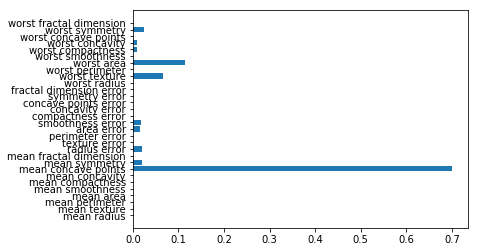

In [39]:
import matplotlib.pyplot as plt
plt.barh(cancer.feature_names, df.feature_importances_)

<BarContainer object of 30 artists>

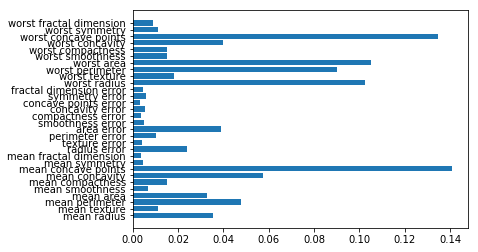

In [40]:
plt.barh(cancer.feature_names, rf.feature_importances_)

### 그라디언트 부스팅 회귀 트리
- 트리 앙상블
- 랜덤포레스트 : 여러 나무를 서로 다른 데이터로 독립적으로 학습(병렬 가능)
- Gradient boosting deciton tree : 나무 하나씩 순차적으로 학습, 이전 나무의 오류를 최소화 하는 방향으로 학습
  - 작은 나무 1~5개
    - 나무가 작다(max_depth가 작고, leaf가 적다) - 약한 학습기(weak learner)
    

In [42]:
#p122 보통 안정적인 랜덤 포레스트 먼저 사용, 더 성능을 높이고 싶을때 사용
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
gbc = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

In [45]:
gbc.score(X_train, y_train), gbc.score(X_test, y_test)
#과적합 > 트리를 작게 만들자 > 사전/사후 가지치기

(1.0, 0.958041958041958)

In [47]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)
gbc.score(X_train, y_train), gbc.score(X_test, y_test)

(0.9906103286384976, 0.972027972027972)

In [48]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=2).fit(X_train, y_train)
gbc.score(X_train, y_train), gbc.score(X_test, y_test)

(1.0, 0.972027972027972)

<BarContainer object of 30 artists>

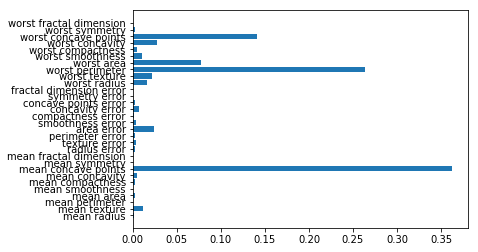

In [49]:
plt.barh(cancer.feature_names, gbc.feature_importances_)

#131 에이다부스트(adaboost) : Adaptive Boosting
- 그라디언트 부스트 트리와 비슷,
- 차이 : GB : 이전 트리의 오차를 최소화
         AB : 이전 트리의 오차 샘플에 가중치를 높여서 다음 트리에서 학습

In [51]:
#132
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(random_state=0).fit(X_train, y_train)
adc.score(X_train,y_train), adc.score(X_test,y_test)


(1.0, 0.9790209790209791)

<BarContainer object of 30 artists>

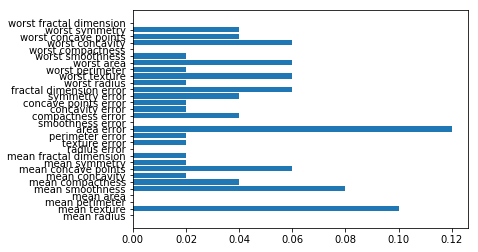

In [52]:
#특성 중요도
plt.barh(cancer.feature_names, adc.feature_importances_)

결정 트리 > 과적합 > 앙상블(랜덤 포레스트, 그라디언트 부스팅 or 에이다 부스트)
최종 결정 : 분류 작업일 경우는 투표(다수결), 예측일 때는 평균

- 134 SVM(Support vector machine)
- 139 학습 : 데이터 포인트(샘플) 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 배운다
> 경계와 그주변 이외의 데이터는 사용하지 않는다!!!


In [53]:
from sklearn.svm import SVC, SVR # SVM-C분류용, SVM-R회귀용
import mglearn

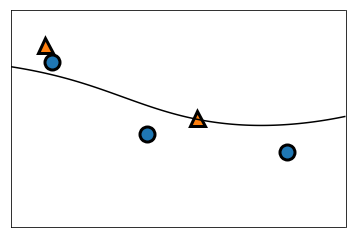

In [56]:
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1], sv_labels, s=15, markeredgewidth=3)

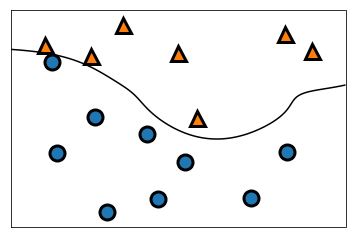

In [57]:
gamma = 1
c = 10
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=c, gamma=gamma).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1], sv_labels, s=15, markeredgewidth=3)

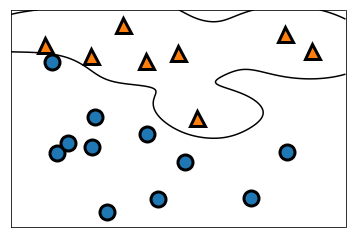

In [64]:
gamma = 2  # 하나의 샘플이 미치는 영향의 범위, 작으면 넓은 범위
c = 20 #규제(regularizain : 파라미터 값이 작아지도록 규제, 값이 작으면 오버핏, 크면 완만해짐)
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=c, gamma=gamma).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1], sv_labels, s=15, markeredgewidth=3)

In [68]:
sv = SVC(gamma='auto').fit(X_train,y_train)

In [69]:
sv.score(X_train,y_train), sv.score(X_test,y_test) # 과대적합
#값을 정규화하면 95%까지 상승
#C를 올리면 97%

(1.0, 0.6293706293706294)

In [71]:
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

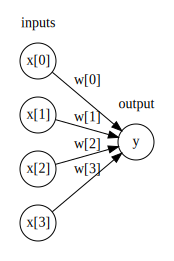

In [72]:
#신경망(neural network) : 다층 퍼셉트론 (multilayer perceptrons)
display(mglearn.plots.plot_logistic_regression_graph())

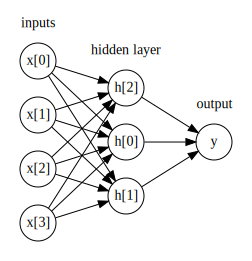

In [73]:
display(mglearn.plots.plot_single_hidden_layer_graph())

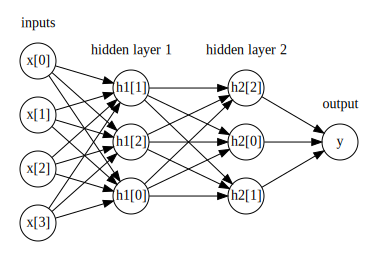

In [74]:
display(mglearn.plots.plot_two_hidden_layer_graph())
# 히든레이어가 없으면 Linear/Logistic regression
# 히든레이어가 1~3이면 신경망(MLP)
#2000년대 이후 히든레이어가 10~100~1000 많아진 모델을 딥 뉴럴 네트워크라고 한다

In [77]:
#151
from sklearn.neural_network import MLPClassifier, MLPRegressor
mlp = MLPClassifier().fit(X_train, y_train)

In [78]:

mlp.score(X_train,y_train), mlp.score(X_test,y_test)
# 과소적합 : under fitting

(0.9295774647887324, 0.9440559440559441)

In [84]:
mlp = MLPClassifier(hidden_layer_sizes=(75,50)).fit(X_train, y_train)
mlp.score(X_train,y_train), mlp.score(X_test,y_test)

(0.9131455399061033, 0.916083916083916)

In [85]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50,20)).fit(X_train, y_train)
mlp.score(X_train,y_train), mlp.score(X_test,y_test)

(0.9225352112676056, 0.9370629370629371)

In [94]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,85,50)).fit(X_train, y_train)
mlp.score(X_train,y_train), mlp.score(X_test,y_test)

(0.92018779342723, 0.9440559440559441)

In [95]:
# 장점 : 모델 형태를 내마음대로 설계, 형태가 최적일때, 성능 좋다.
# 단점 : 어떤 형태가 최선인가?, 학습 속도가 느리고, 분석이 까다롭다

KNN(예측, 분류), Linear Regression(예측), Logistic Regression(분류)
Decision Tree(예측, 분류)->보고용, Random Forest, Gradient Boost Decision Tree, AdaBoost,
SVM(SVMC 분류용/SVMR 예측용), MLP(뉴럴네트워크)